In [1]:
import json
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ghazali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghazali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# the number of lines to read
N = 500

file_path = "yelp_academic_dataset_tip.json"
corp = []

stop_words = set(stopwords.words("english"))

with open(file_path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= N:
            break

        data = json.loads(line)
        text = data.get("text", "").lower()  # Extract "text" column and convert to lowercase
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        text = re.sub(r"\d+", "", text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        corp.append(tokens)

#sample processed text
print("Sample Processed Text:", corp[:30])


Sample Processed Text: [['avengers', 'time', 'ladies'], ['lots', 'good', 'deserts', 'tasty', 'cuban', 'sandwiches'], ['open', 'even', 'think', 'isnt'], ['decent', 'fried', 'chicken'], ['appetizers', 'platter', 'special', 'lunch'], ['chili', 'cup', 'single', 'cheeseburger', 'onion', 'pickle', 'relish', 'vanilla', 'cocacolaso', 'far'], ['saturday', 'dec', 'th', 'ride', 'patcos', 'silver', 'sleigh', 'w', 'santa', 'elves', 'decorated', 'train', 'center', 'city', 'trains', 'leave', 'lindenwold', 'pm', 'make', 'stops', 'great', 'kids'], ['probably', 'best', 'place', 'cool', 'springs', 'area', 'watch', 'game', 'eat'], ['tacos'], ['starbucks', 'substitute', 'boring', 'downtown', 'tampa', 'ugh', 'never'], ['order', 'tortilla', 'soup'], ['good', 'definitely', 'coming', 'back'], ['hotlight', 'must', 'stop'], ['lets', 'go', 'yankees'], ['basically', 'food', 'rallys'], ['dont', 'go', 'dinner', 'close', 'really', 'yvonne', 'l', 'negative', 'stars', 'restaurant', 'didnt', 'never', 'intended', 'eat'],

In [6]:
#Step 1

In [6]:
!pip install gensim


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy
import gensim

print("NumPy version:", numpy.__version__)
print("Gensim version:", gensim.__version__)


NumPy version: 1.26.4
Gensim version: 4.3.3


In [44]:
from gensim.models import FastText

# the n grams here is default 3 to 6
model = FastText(sentences=corp, vector_size=300, window=2, workers=8 )
# Save the model
model.save("yelp_fasttext.bin")


In [48]:
# Test: Find similar and opposite words
word = "food"
print("Similar words:", model.wv.most_similar(word, topn=10))
print("Opposite words:", model.wv.most_similar(negative=[word], topn=10))


Similar words: [('seafood', 0.606755256652832), ('good', 0.5747077465057373), ('looking', 0.5512557029724121), ('bring', 0.5353032350540161), ('thing', 0.5351284146308899), ('amazing', 0.5322558283805847), ('everything', 0.5271458029747009), ('service', 0.5234354734420776), ('rice', 0.5233467221260071), ('parking', 0.5214540362358093)]
Opposite words: [('know', -0.04041145369410515), ('w', -0.04157042130827904), ('burritos', -0.04240736365318298), ('omg', -0.04788198694586754), ('kids', -0.05802932381629944), ('oh', -0.06996455788612366), ('enjoy', -0.07522227615118027), ('ask', -0.08398062735795975), ('inside', -0.08483602851629257), ('miss', -0.08858897536993027)]


In [50]:
from gensim.models.fasttext import FastText

#Loading the model after training
model_gensim = FastText.load("yelp_fasttext.bin")
word = "food"
print("Similar words:", model_gensim.wv.most_similar(word, topn=10))
print("Opposite words:", model_gensim.wv.most_similar(negative=[word], topn=10))



Similar words: [('seafood', 0.606755256652832), ('good', 0.5747077465057373), ('looking', 0.5512557029724121), ('bring', 0.5353032350540161), ('thing', 0.5351284146308899), ('amazing', 0.5322558283805847), ('everything', 0.5271458029747009), ('service', 0.5234354734420776), ('rice', 0.5233467221260071), ('parking', 0.5214540362358093)]
Opposite words: [('know', -0.04041145369410515), ('w', -0.04157042130827904), ('burritos', -0.04240736365318298), ('omg', -0.04788198694586754), ('kids', -0.05802932381629944), ('oh', -0.06996455788612366), ('enjoy', -0.07522227615118027), ('ask', -0.08398062735795975), ('inside', -0.08483602851629257), ('miss', -0.08858897536993027)]


In [8]:
from gensim.models import FastText
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Visualization function
def visualize_words(model, keywords, title):
    labels = []
    vectors = []

    for word in keywords:
        try:
            vectors.append(model.wv[word])
            labels.append(word)

            similar_words = model.wv.most_similar(word, topn=5)
            for sim_word, _ in similar_words:
                if sim_word not in labels:
                    vectors.append(model.wv[sim_word])
                    labels.append(sim_word)
        except KeyError:
            print(f"'{word}' not found in vocabulary")

    tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
    reduced =  tsne.fit_transform(np.array(vectors))

    plt.figure(figsize=(10, 8))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.annotate(label, (x, y), fontsize=12)
    plt.title(title)
    plt.grid(True)
    plt.show()


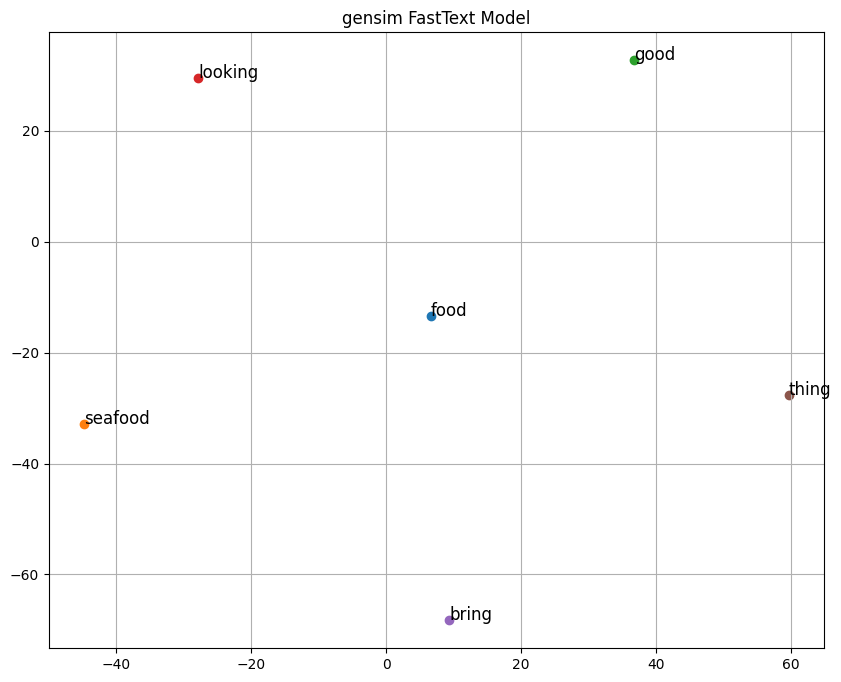

In [52]:

gensim_model = FastText.load("yelp_fasttext.bin")

keywords = ["food"]
visualize_words(gensim_model, keywords, "gensim FastText Model")


In [8]:
#Step 2

In [1]:
from gensim.models.fasttext import load_facebook_vectors


model_path = r"cc.en.300.bin"

model_FastText = load_facebook_vectors(model_path)

food_vector = model_FastText['food']



In [2]:

print("Vector for 'food':", food_vector)


similar_words = model_FastText.most_similar('food', topn=10)
print("Similar words for 'food':", similar_words)


opposite_words = model_FastText.most_similar(negative=['food'], topn=10)
print("Opposite-like words for 'food':", opposite_words)

Vector for 'food': [-4.69152741e-02  1.68383121e-01  4.13426869e-02  1.18724920e-01
  7.44421110e-02  1.02483042e-01  2.74693608e-01 -4.99803238e-02
 -3.82178761e-02  4.71118502e-02 -3.11280210e-02 -5.12010790e-02
  1.51163474e-01  1.00542158e-01  7.52756223e-02 -1.69176459e-02
  3.12395822e-02 -5.45234829e-02 -4.95291837e-02 -1.42963724e-02
  5.96748590e-02  2.91416850e-02 -6.94199130e-02  8.32179263e-02
 -1.35028185e-02 -3.81789096e-02  1.16999112e-01 -2.49370918e-01
 -8.12098309e-02  9.88174453e-02 -4.43214066e-02  1.25030294e-01
 -1.26223728e-01  2.89493543e-03  9.29308403e-03 -3.81546706e-04
  2.77288798e-02  2.92868931e-02 -4.53447811e-02 -1.91768005e-01
 -2.89430525e-02 -2.51916726e-03 -2.45814268e-02  6.90041929e-02
 -1.95163682e-01 -6.18660860e-02 -1.35786876e-01 -6.75999001e-02
 -2.97333952e-02  1.07101642e-01 -8.46882761e-02 -1.87789977e-01
 -1.10659033e-01  1.21782444e-01 -1.46152601e-01  1.49076566e-01
  1.35647282e-01 -1.59707293e-01 -1.56346440e-01  2.23593321e-02
  1.59

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def visualize_words_300(model, keywords, title):
    vectors = []
    labels = []

    for word in keywords:
        try:
            vectors.append(model[word])
            labels.append(word)

            similar_words = model.most_similar(word, topn=5)
            for sim_word, _ in similar_words:
                vectors.append(model[sim_word])
                labels.append(sim_word)
        except KeyError:
            print(f"Word '{word}' not in vocabulary.")

    vectors = np.array(vectors)


    if len(vectors) <= 5:
        raise ValueError("Not enough data points for t-SNE (must be > perplexity).")

    tsne = TSNE(n_components=2, random_state=0, perplexity=5, max_iter=1000)
    reduced = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced[:, 0], reduced[:, 1])

    for i, label in enumerate(labels):
        plt.annotate(label, (reduced[i, 0], reduced[i, 1]))

    plt.title(title)
    plt.grid(True)
    plt.show()


In [5]:
from gensim.models.fasttext import load_facebook_vectors

gensim_model = load_facebook_vectors("cc.en.300.bin")
keywords = ["food"]



['food']


C:\Program Files\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Program Files\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

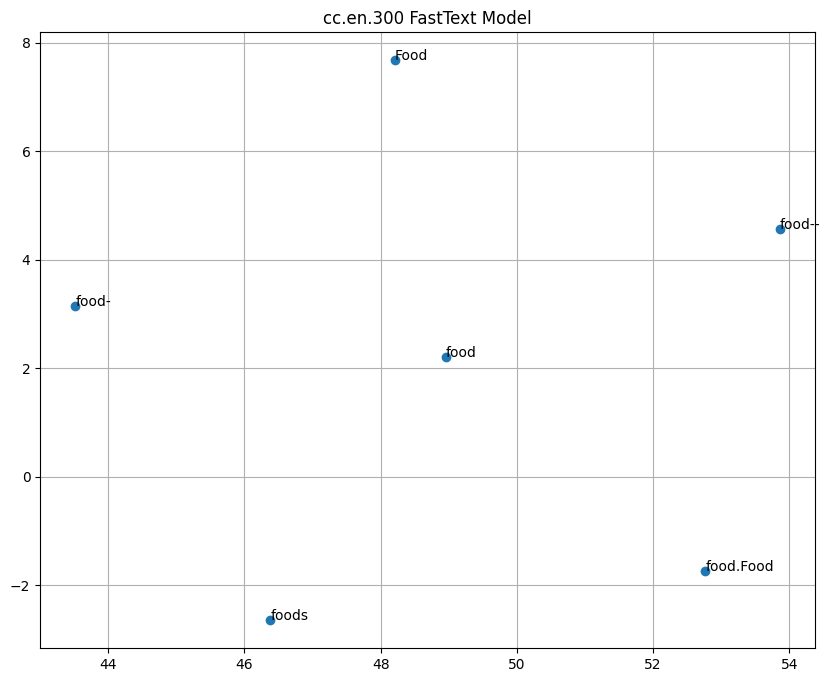

In [9]:
visualize_words_300(gensim_model, keywords, "cc.en.300 FastText Model")


In [12]:
#Step 3

In [5]:
from gensim.models.fasttext import load_facebook_model

model = load_facebook_model("cc.en.300.bin")

model.build_vocab(corp, update=True)

model.train(corp, total_examples=len(corp), epochs=3)

# Save the updated model
model.save("updated_fasttext_yelp.bin")


In [27]:
#1000 line
word = "food"
print("Similar words:", model.wv.most_similar(word, topn=10))
print("Opposite words:", model.wv.most_similar(negative=[word], topn=10))


Similar words: [('foods', 0.7101418375968933), ('food--', 0.6892086267471313), ('food.Food', 0.6853983998298645), ('food.However', 0.6814699172973633), ('food-', 0.6718795299530029), ('food.It', 0.6711847186088562), ('food.But', 0.6683051586151123), ('food.As', 0.6682285666465759), ('Food', 0.6680823564529419), ('food.The', 0.6639886498451233)]
Opposite words: [('318ti.org', 0.20351459085941315), ('Modèle', 0.20137853920459747), ('1.0000', 0.2009362429380417), ('TORR', 0.19919227063655853), ('Arminius', 0.19694383442401886), ('Quatuor', 0.19538038969039917), ('BREACH', 0.19478459656238556), ('Propuesta', 0.19442413747310638), ('6.0x', 0.19432564079761505), ('Boutell', 0.19373778998851776)]


In [6]:
#500 line
word = "food"
print("Similar words:", model.wv.most_similar(word, topn=10))
print("Opposite words:", model.wv.most_similar(negative=[word], topn=10))


Similar words: [('foods', 0.6986084580421448), ('food--', 0.6841468811035156), ('food.Food', 0.6823720932006836), ('Food', 0.671140193939209), ('food-', 0.6673637628555298), ('food.It', 0.6661560535430908), ('food.But', 0.6628791093826294), ('food.As', 0.6627615690231323), ('food.The', 0.6589952707290649), ('foood', 0.6586076617240906)]
Opposite words: [('318ti.org', 0.20704932510852814), ('1.0000', 0.2045804262161255), ('Modèle', 0.20429864525794983), ('Arminius', 0.19978246092796326), ('TORR', 0.1995186060667038), ('Quatuor', 0.19865311682224274), ('6.0x', 0.19846433401107788), ('BREACH', 0.1978229284286499), ('Boutell', 0.19723983108997345), ('CS-6', 0.19572767615318298)]


In [4]:
from gensim.models.fasttext import FastText

# Load the updated FastText model
model_fineTuned = FastText.load("updated_fasttext_yelp.bin")
word = "food"
similar_words = model_fineTuned.wv.most_similar(word, topn=10)
print("Similar words:", similar_words)


Similar words: [('foods', 0.7101418375968933), ('food--', 0.6892086267471313), ('food.Food', 0.6853983998298645), ('food.However', 0.6814699172973633), ('food-', 0.6718795299530029), ('food.It', 0.6711847186088562), ('food.But', 0.6683051586151123), ('food.As', 0.6682285666465759), ('Food', 0.6680823564529419), ('food.The', 0.6639886498451233)]


In [5]:
print("Opposite words:", model_fineTuned.wv.most_similar(negative=[word], topn=10))


Opposite words: [('318ti.org', 0.20351459085941315), ('Modèle', 0.20137853920459747), ('1.0000', 0.2009362429380417), ('TORR', 0.19919227063655853), ('Arminius', 0.19694383442401886), ('Quatuor', 0.19538038969039917), ('BREACH', 0.19478459656238556), ('Propuesta', 0.19442413747310638), ('6.0x', 0.19432564079761505), ('Boutell', 0.19373778998851776)]


In [13]:

update_model = load_facebook_vectors("updated_fasttext_yelp.bin")
keywords = ["food"]


NotImplementedError: Supervised fastText models are not supported

In [ ]:
visualize_words_300(update_model, keywords, "finetuned cc.en.300 Model")
